<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Lesson8_GradientDescent/GradientDescentBase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Производная, градиент и градиентный спуск.

## План занятия

1)	Вычисление производных в Python

2)	Градиентный спуск: теория

4)	Пишем одномерный градиентный спуск в python

4)  Градиентный спуск в sklearn

## Задание 1 (на доске)

Исследовать функцию $f(x)=x^3 - 3x^2 + 4$:
- найти локальные экстремумы и определить их тип
- найти точки перегиба

## Задание 2

Проверить себя в python.

В python есть удобная библиотека для символьных вычислений - SymPy. Будем пользоваться ей для вычисления производных сегодня.

[Тут](https://towardsdatascience.com/taking-derivatives-in-python-d6229ba72c64) можно почитать подробнее про сегодняшнюю тему в SymPy.

Установим SymPy и посмотрим, как вычислять производные с её помощью.

In [ ]:
!pip install sympy

In [ ]:
import sympy as sp

In [ ]:
x = sp.Symbol('x')

In [ ]:
sp.diff(x**6)

6*x**5

Теперь вычислим производную функции из условия задания.

Для этого напишем функцию, задающую зависимость $f(x)$.

In [ ]:
def f(x):
  return x**3 - 3*x**2 + 4

In [ ]:
f(0)

4

Чтобы найти нули функции, надо решить уравнение $f(x)=0$. В SymPy для этого есть функция solve.

In [ ]:
sp.solve(f(x))   # f(x) = 0 относительно x

[-1, 2]

Теперь найдем производную функции $f(x)$ и затем её нули, чтобы найти экстремумы.

In [ ]:
df_x = sp.diff(f(x))
df_x

3*x**2 - 6*x

In [ ]:
type(df_x)

sympy.core.add.Add

Если мы хотим вычислить значение функции с помощью SymPy, то делаем так:

In [ ]:
df_x.subs(x, 10)

240

In [ ]:
df_x(0)

TypeError: 'Add' object is not callable

In [ ]:
sp.solve(df_x, x)

[0, 2]

In [ ]:
f(0), f(2)

(4, 0)

Найдем нули второй производной для определения точек перегиба функции.

In [ ]:
d2f_x = sp.diff(df_x)
d2f_x

6*x - 6

In [ ]:
sp.solve(d2f_x, x)

[1]

In [ ]:
f(1)

2

## Задание 3.

- Нарисовать график функции $f(x)$, подписать оси
- Напечатать под графиком при помощи *Markdown* экстремумы, точки перегиба и значения функции $f(x)$ в этих точках

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Нарисуем график функции f(x)

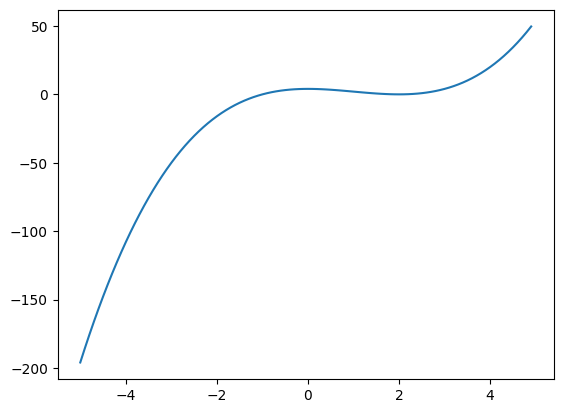

In [ ]:
import numpy as np

x_values = [x for x in np.arange(-5, 5, 0.1)] # -5, -4.9, -4.8,..., 4.9
# x_values = np.linspace(-5, 5, 100)

f_values = [f(x) for x in x_values] # список значений функции

plt.plot(x_values, f_values)

Определим граничные значения по осям, чтобы сделать картинку понятнее.

Также изменим размер картинки.

(-5.0, 7.0)

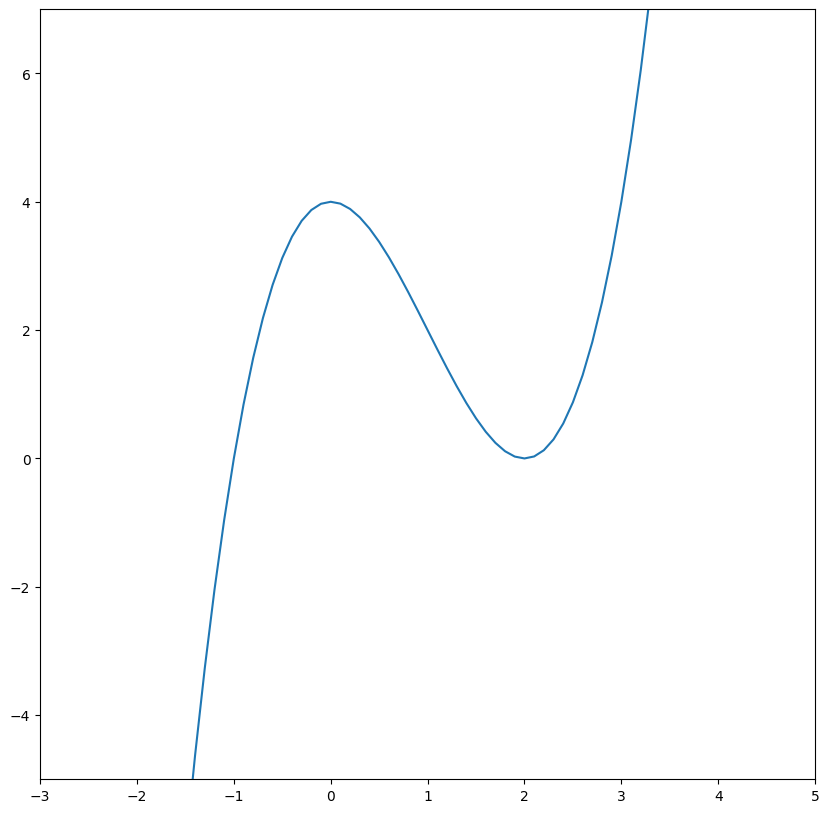

In [ ]:
x_values = [x for x in np.arange(-5, 5, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10,10))

plt.plot(x_values, f_values)

plt.xlim([-3, 5])
plt.ylim([-5, 7])

Добавим названия осей и подпись к графику.

Text(0, 0.5, 'f(x)')

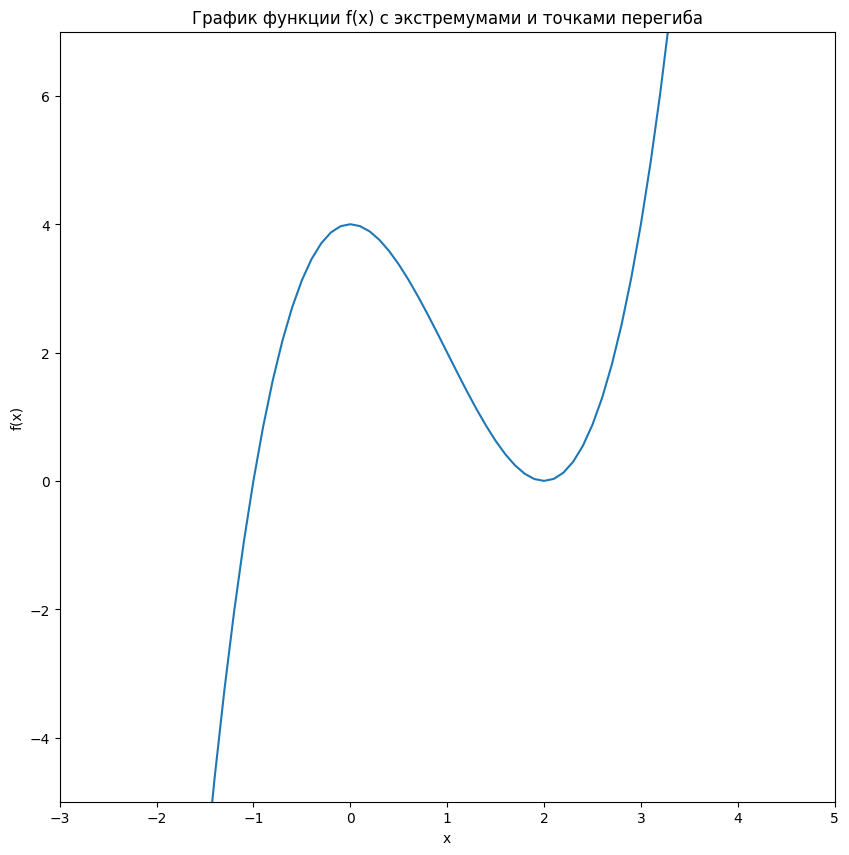

In [ ]:
x_values = [x for x in np.arange(-5, 5, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10,10))

plt.plot(x_values, f_values)

plt.xlim([-3, 5])
plt.ylim([-5, 7])

plt.title('График функции f(x) c экстремумами и точками перегиба')

plt.xlabel('x')
plt.ylabel('f(x)')

Добавим оси и подпишем под картинкой информацию об экстремумах и точках перегиба.

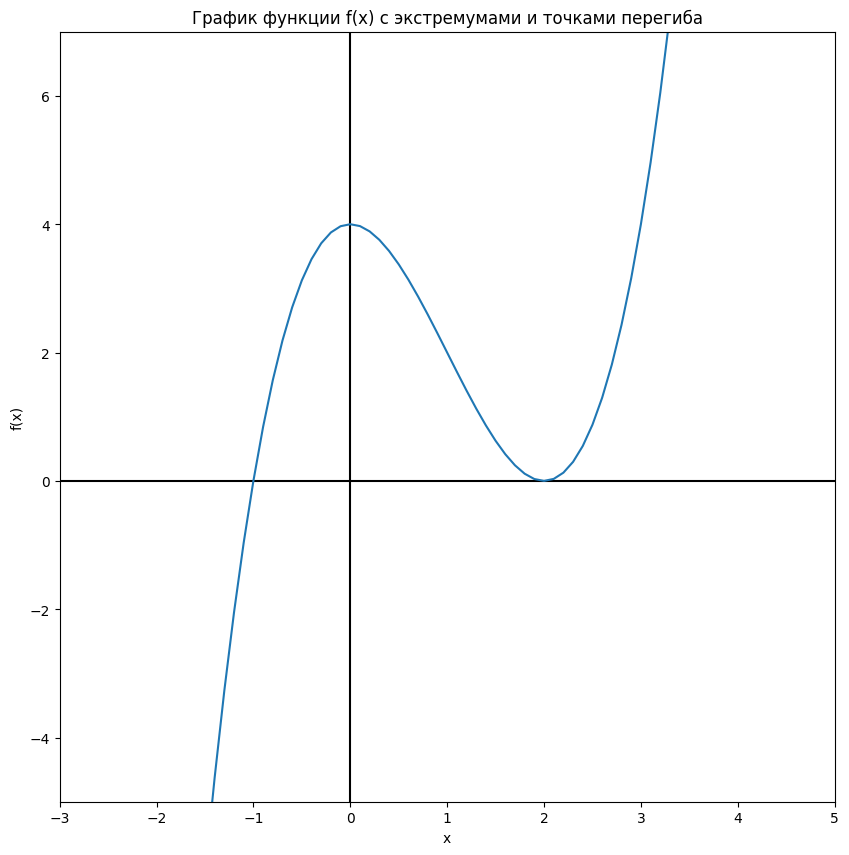

In [ ]:
import numpy as np

x_values = np.arange(-5, 5, 0.1)
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10,10))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.plot(x_values, f_values)

plt.xlim([-3, 5])
plt.ylim([-5, 7])

plt.title('График функции f(x) c экстремумами и точками перегиба')

plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

Экстремумы:
*    (0, 4) - точка максимума
*    (2, 0) - точка минимума

Точки перегиба:
*    (1, 2) - точка перегиба


## Градиентный спуск. Теория.

$x_{new} = x - \lambda\cdot f'(x)$

## Задание 4

Написать градиентный спуск в python

In [ ]:
def gradient_descent(x_start, learning_rate, epsilon, num_iterations):
    x_curr = x_start
    df_x = sp.diff(f(x)) # производная

    trace = []
    trace.append(x_curr)

    for i in range(num_iterations):
      x_new = x_curr - learning_rate * df_x.subs(x, x_curr)
      trace.append(x_new)

      if abs(x_new - x_curr) < epsilon:
        return x_curr, trace

      x_curr = x_new

    return x_curr, trace

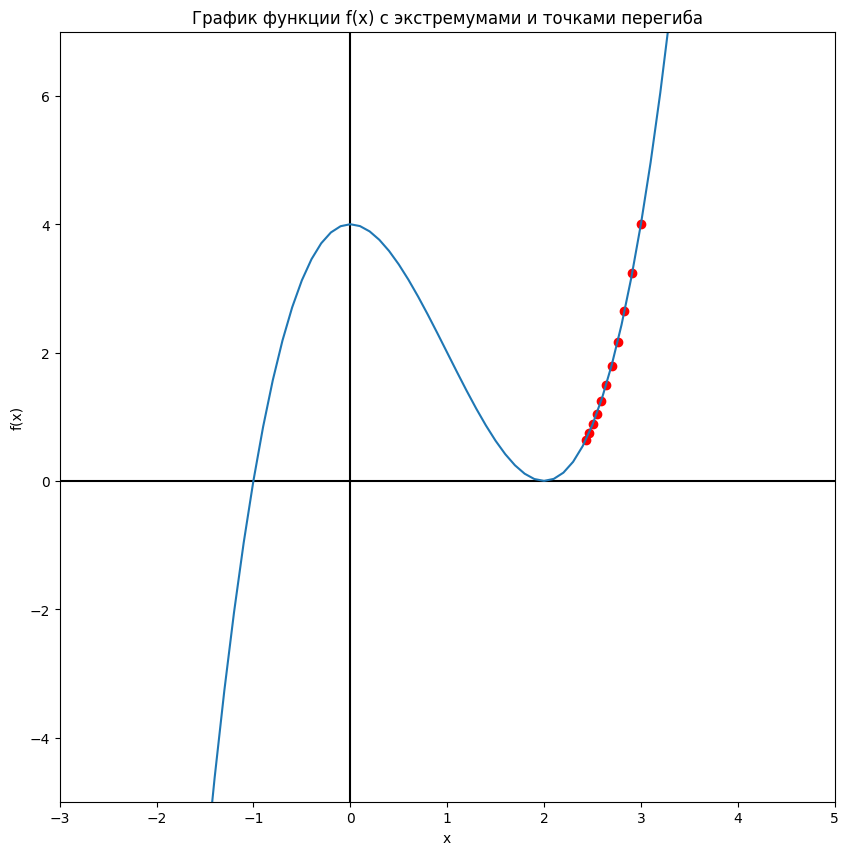

In [ ]:
xmin, trace = gradient_descent(3, 0.01, 0.001, 10)

x_values = [x for x in np.arange(-5, 5, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10,10))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.plot(x_values, f_values)

plt.xlim([-3, 5])
plt.ylim([-5, 7])

plt.title('График функции f(x) c экстремумами и точками перегиба')

plt.xlabel('x')
plt.ylabel('f(x)')

trace_values = [f(x) for x in trace]
plt.scatter(trace, trace_values, c='red')

plt.show()

# Градиентный спуск в Python

Сгенерируем выборку для задачи регрессии.

In [ ]:
import numpy as np
from matplotlib import pylab as plt
%pylab inline

from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 10000)
print(X.shape, y.shape)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.12/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f', 'plt', 'trace']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


(10000, 100) (10000,)


У нас 10000 объектов и 100 признаков. Для начала решим задачу аналитически "из коробки".

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

lr.fit(X, y)

print(mean_squared_error(y, lr.predict(X)))

9.898969454489876e-26


Посмотрим на коэффициенты модели.

In [ ]:
lr.intercept_, lr.coef_[:5]

(np.float64(-2.220446049250313e-15),
 array([ 6.70801944e-15, -1.06581410e-14,  2.88657986e-14,  9.41469125e-14,
        -2.13162821e-14]))

Теперь попробуем обучить линейную регрессию методом градиентного спуска "из коробки".

Попробуем разные значения градиентного шага $\alpha$.

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor() # alpha - градиентный шаг
sgd.fit(X, y)

print(mean_squared_error(y, sgd.predict(X)))

0.0001745743344403571


In [ ]:
sgd.intercept_, sgd.coef_[:5]

(array([1.6563214e-05]),
 array([ 9.67756542e-06, -1.11252674e-04, -2.80158176e-06, -2.23723741e-04,
         1.81134249e-04]))